# Getting Started with Image Processing with Python.

Introduction to Python Imaging Library(PIL)

Exercise - 1

1. Read and display the image.

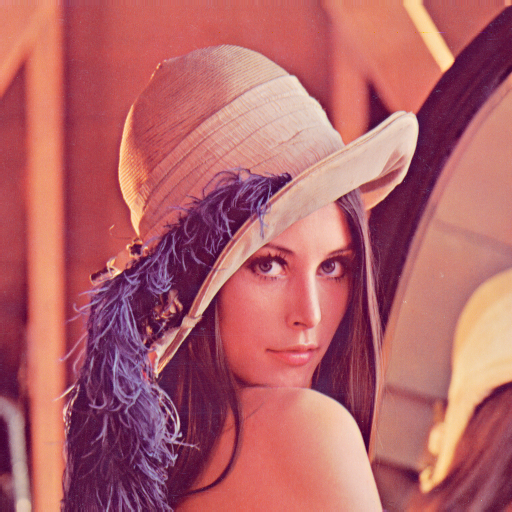

In [ ]:
from PIL import Image

# display image in colab
image_colored = Image . open ("/content/Lenna_(test_image).png")
display ( image_colored )

2. Display only the top left corner of 100x100 pixels

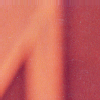

In [ ]:
import numpy as np
image_np = np.array(image_colored)
top_left_corner = image_np[:100, :100]
display(Image.fromarray(top_left_corner))

3. Show the three color channels (R, G, B)

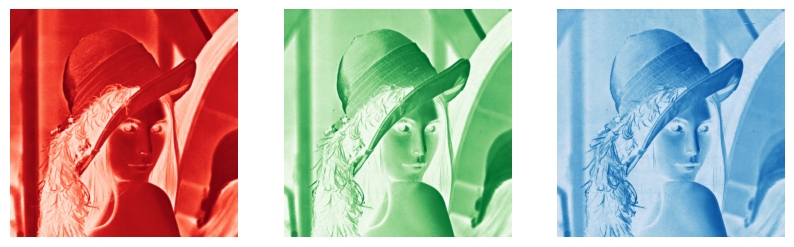

In [ ]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("/content/Lenna_(test_image).png")
# Convert the image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Split the image into its RGB channels
r, g, b = cv2.split(image_rgb)
# Display the three channels
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(r, cmap='Reds')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(g, cmap='Greens')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(b, cmap='Blues')
plt.axis('off')

plt.show()

4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:

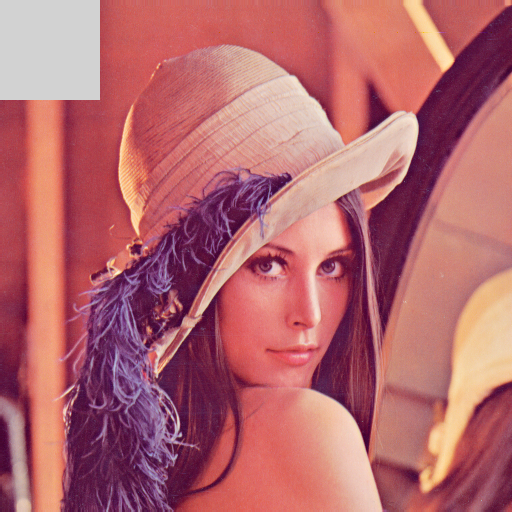

In [ ]:
modified_image = image_np.copy()
modified_image[:100, :100] = 210
display(Image.fromarray(modified_image))

Exercise - 2

1. Load and display a grayscale image.

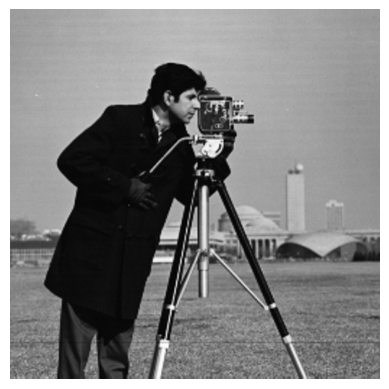

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_gray = Image.open("/content/cameraman.png").convert('L')

# Display the grayscale image
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.show()

2. Extract and display the middle section of the image (150 pixels).

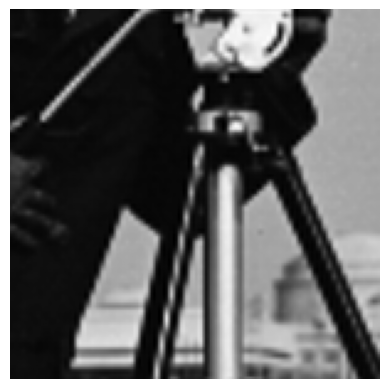

In [ ]:
import numpy as np

# Convert the image to a NumPy array
image_np = np.array(image_gray)

# extract the middle section
height, width = image_np.shape
center_x = width // 2
center_y = height // 2
cropped_image = image_np[center_y - 75:center_y + 75, center_x - 75:center_x + 75]
plt.imshow(cropped_image, cmap='gray')
plt.axis('off')
plt.show()

3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).

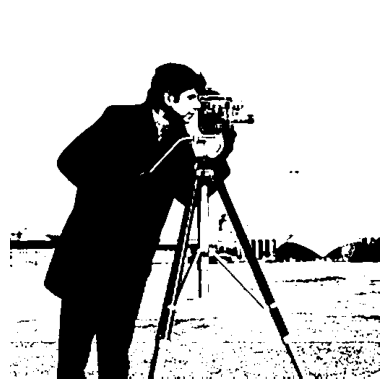

In [ ]:
# threshold
threshold_value = 100
binary_image = np.where(image_np < threshold_value, 0, 255)

# binary image
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()

4. Rotate the image 90 degrees clockwise and display the result.

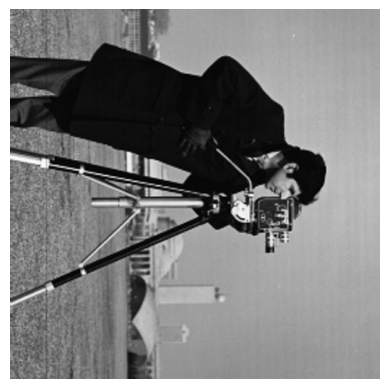

In [ ]:
rotated_image = image_gray.rotate(-90)

plt.imshow(rotated_image, cmap='gray')
plt.axis('off')
plt.show()

5. Convert the grayscale image to an RGB image.

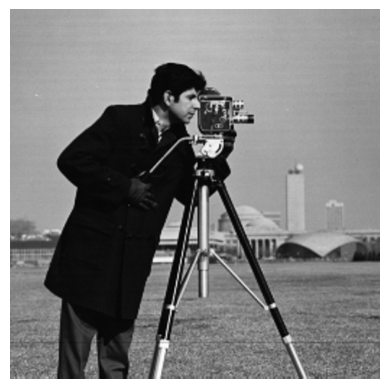

In [ ]:
image_rgb = Image.fromarray(image_np).convert('RGB')

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# Image Compression and Decompression using PCA.

1. Load and Prepare Data:

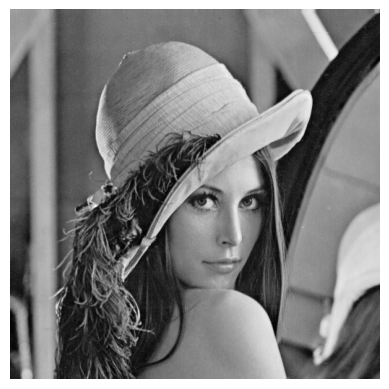

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
image = Image.open("/content/lena_gray.gif").convert('L')
image_np = np.array(image)
image_centered = image_np - np.mean(image_np)
image_std = image_centered / np.std(image_centered)
covariance_matrix = np.cov(image_std, rowvar=False)
plt.imshow(image_np, cmap='gray')
plt.axis('off')
plt.show()

2. Eigen Decomposition and Identifying Principal Components

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Cumulative Explained Variance Ratio')

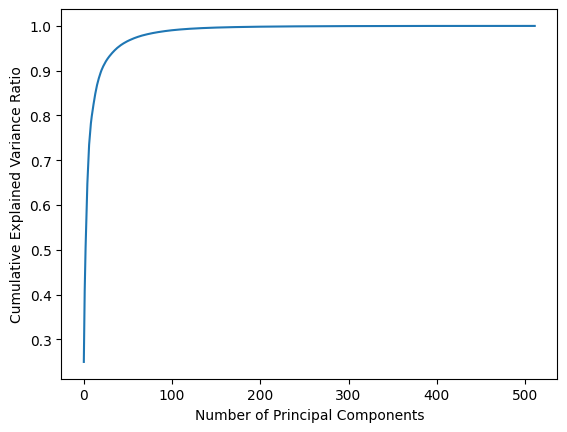

In [ ]:
from numpy.linalg import eig

eigen_values, eigen_vectors = eig(covariance_matrix)

sorted_indices = np.argsort(eigen_values)[::-1]
sorted_eigen_values = eigen_values[sorted_indices]
sorted_eigen_vectors = eigen_vectors[:, sorted_indices]

k = 100
top_k_eigen_vectors = sorted_eigen_vectors[:, :k]

explained_variance_ratio = np.cumsum(sorted_eigen_values) / np.sum(sorted_eigen_values)
plt.plot(explained_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')

3. Reconstruction and Experiment

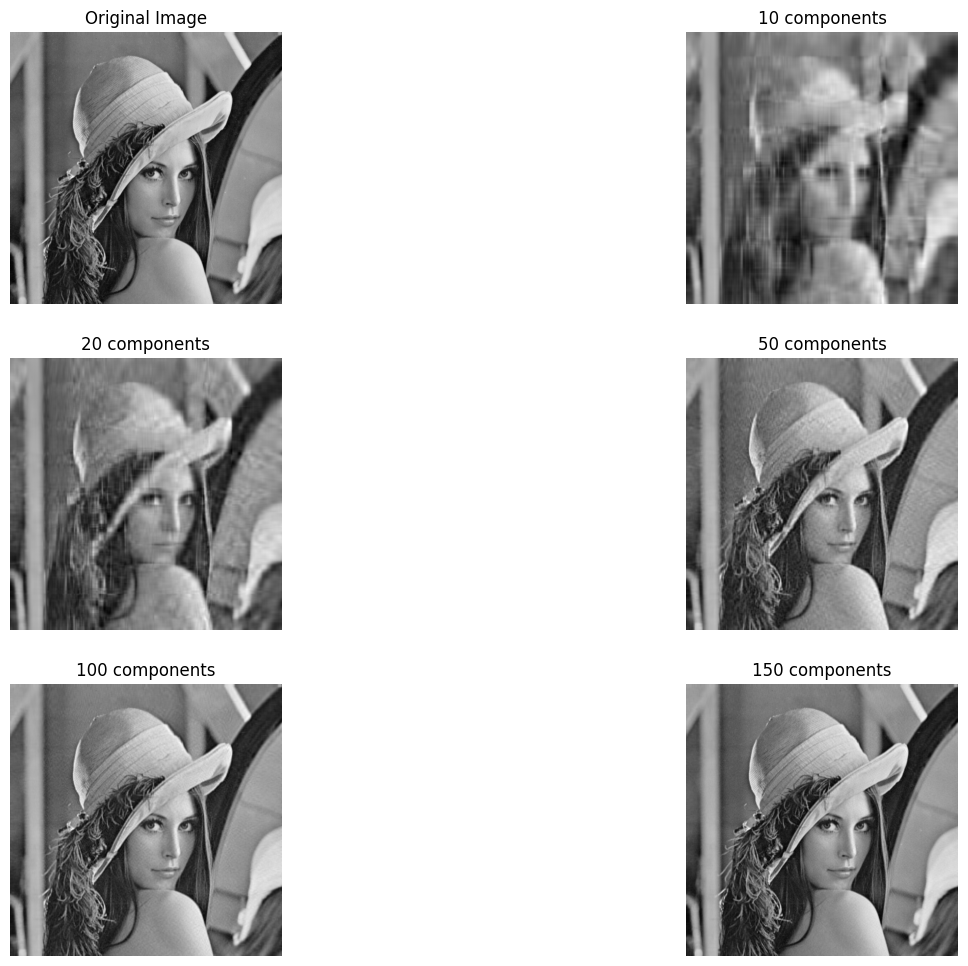

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open("/content/lena_gray.gif")

image_gray = image.convert("L")
image_array = np.array(image_gray)
mean = np.mean(image_array, axis=0)
centered_data = image_array - mean
cov_matrix = np.cov(centered_data.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

top_k = [10, 20, 50, 100, 150]

explained_variance = eigenvalues_sorted / np.sum(eigenvalues_sorted)

plt.figure(figsize=(16, 12))

plt.subplot(3, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title("Original Image")
plt.axis('off')

for i, k in enumerate(top_k):
    selected_eigenvectors = eigenvectors_sorted[:, :k]
    projected_data = np.dot(centered_data, selected_eigenvectors)
    reconstructed_data = np.dot(projected_data, selected_eigenvectors.T) + mean
    reconstructed_data = np.real(reconstructed_data)
    plt.subplot(3, 2, i + 2)
    plt.imshow(reconstructed_data, cmap='gray')
    plt.title(f"{k} components")
    plt.axis('off')

plt.show()